<a href="https://colab.research.google.com/github/neetuaashi/NeetuSingh/blob/master/Final_Prostrate_Cancer_SVM_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_excel('/content/drive/MyDrive/PCA_STAGE_BASED_CLASSIFICATION.xlsx')
train_data.head()

,PCA_STAGE,GSHG0000008,GSHG0000017,GSHG0000018,GSHG0000026,GSHG0000027,GSHG0000029,GSHG0000033,GSHG0000035,GSHG0000036,...,GSHG0051555,GSHG0051559,GSHG0051578,GSHG0051581,GSHG0051588,GSHG0051591,GSHG0051597,GSHG0051601,GSHG0051602,Outcome
0,pT3a,7.604725,5.93074,9.28309,7.242785,7.005525,7.14975,9.247600,7.486895,7.33985,...,6.59991,7.21917,5.038410,6.37504,6.64386,7.33092,7.816270,8.062970,7.10852,2
1,N_1,6.465740,6.08746,8.97728,7.531295,7.266755,7.40939,9.919400,7.479640,7.62205,...,9.45943,6.91886,5.101065,6.84549,5.93074,7.70044,8.787070,7.266755,7.37504,0
2,pT3b,7.317235,6.58496,8.29002,7.139515,7.339600,7.63662,9.137920,7.179600,7.15987,...,6.37504,7.41785,4.649605,7.14975,6.65821,7.49985,8.611960,7.751460,7.43463,3
3,N_2,6.445800,6.85798,8.85175,7.647455,7.503820,7.82655,9.880605,7.266755,7.43463,...,7.46761,7.42626,5.409290,7.24793,6.20945,7.08746,9.476720,7.320545,7.24793,0
4,pT3a,7.021685,6.32193,8.47978,7.554565,7.441775,7.89482,9.462780,7.004740,7.05528,...,6.33985,7.15987,4.779210,6.94251,6.18982,7.62936,8.183205,6.766785,7.88264,2


Data Wrangling

In [ ]:
train_data.isnull().sum()

PCA_STAGE      0
GSHG0000008    0
GSHG0000017    0
GSHG0000018    0
GSHG0000026    0
              ..
GSHG0051591    0
GSHG0051597    0
GSHG0051601    0
GSHG0051602    0
Outcome        0
Length: 16204, dtype: int64

In [ ]:

train_data = train_data.drop(['PCA_STAGE'], axis = 1)

In [ ]:
train_data.describe(include='all')

,GSHG0000008,GSHG0000017,GSHG0000018,GSHG0000026,GSHG0000027,GSHG0000029,GSHG0000033,GSHG0000035,GSHG0000036,GSHG0000038,...,GSHG0051555,GSHG0051559,GSHG0051578,GSHG0051581,GSHG0051588,GSHG0051591,GSHG0051597,GSHG0051601,GSHG0051602,Outcome
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.00000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,7.625409,6.553247,8.846202,7.372088,7.318127,7.561067,9.181256,7.390135,7.445572,7.756067,...,6.514587,7.27745,5.301960,6.799834,6.539014,7.645078,7.905435,7.511536,7.224324,1.970803
std,0.584810,0.869841,0.553860,0.290280,0.367854,0.281973,0.490373,0.239411,0.205667,0.131994,...,0.663130,0.34585,1.245742,0.283978,0.193859,0.273548,0.714546,0.932111,0.484999,1.042773
min,6.419995,4.954200,7.507790,6.820120,6.467025,6.794420,7.005525,6.693470,6.807350,7.405085,...,5.087460,6.35755,4.000000,6.022370,5.930740,6.857980,6.257360,4.599835,5.754890,0.000000
25%,7.278610,6.000000,8.471670,7.144575,7.049835,7.392320,8.929960,7.255875,7.294620,7.668845,...,6.087460,7.05528,4.488640,6.599910,6.409390,7.467610,7.446085,6.941320,6.930740,1.000000
50%,7.604725,6.442940,8.787900,7.335385,7.299490,7.562240,9.175835,7.353085,7.434630,7.748190,...,6.491850,7.31288,4.928990,6.794420,6.523560,7.686500,7.897585,7.569835,7.219170,2.000000
75%,8.102130,6.942510,9.228820,7.546890,7.566010,7.768180,9.446790,7.495585,7.569860,7.832835,...,6.845490,7.56986,5.629285,6.977280,6.672430,7.807350,8.315065,8.233610,7.539160,3.000000
max,8.897390,9.867280,10.364100,8.372390,8.424700,8.257390,10.436300,8.597620,8.060700,8.154735,...,9.459430,7.99435,9.720245,7.554590,6.977280,8.312880,9.964890,9.732690,8.379380,4.000000


In [ ]:
# to check correlation beween independent features
train_data.corr()

,GSHG0000008,GSHG0000017,GSHG0000018,GSHG0000026,GSHG0000027,GSHG0000029,GSHG0000033,GSHG0000035,GSHG0000036,GSHG0000038,...,GSHG0051555,GSHG0051559,GSHG0051578,GSHG0051581,GSHG0051588,GSHG0051591,GSHG0051597,GSHG0051601,GSHG0051602,Outcome
GSHG0000008,1.000000,-0.122974,-0.088349,-0.374764,-0.389580,-0.261281,-0.442279,0.009938,-0.268359,0.049678,...,-0.107820,0.346219,0.266779,-0.083206,0.464599,0.225601,-0.266356,0.246763,0.096897,0.034729
GSHG0000017,-0.122974,1.000000,0.189959,0.363409,0.123600,0.024211,0.123709,-0.066141,0.193066,-0.033415,...,-0.044098,-0.011886,-0.090996,-0.061755,-0.067999,-0.004518,0.137672,0.196456,0.070474,0.235471
GSHG0000018,-0.088349,0.189959,1.000000,0.029175,0.394447,-0.177881,0.268190,0.123215,0.297356,0.341180,...,-0.068953,0.184582,0.037796,-0.365853,0.032809,0.005991,-0.313153,0.080879,-0.123534,0.213790
GSHG0000026,-0.374764,0.363409,0.029175,1.000000,0.295004,0.341352,0.346313,0.222309,0.445415,0.106378,...,-0.004080,-0.314835,-0.017155,0.096077,-0.275572,-0.277681,0.115334,-0.096748,0.141785,0.148011
GSHG0000027,-0.389580,0.123600,0.394447,0.295004,1.000000,0.252512,0.370966,0.066554,0.425165,0.233652,...,-0.251513,-0.103548,-0.133973,-0.043598,-0.296168,-0.342520,-0.082395,-0.168029,-0.186870,0.042310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSHG0051591,0.225601,-0.004518,0.005991,-0.277681,-0.342520,-0.300315,-0.333179,0.064610,-0.060204,0.028843,...,-0.064523,0.203759,0.159564,-0.050144,0.322089,1.000000,-0.145761,-0.039778,-0.050874,0.156236
GSHG0051597,-0.266356,0.137672,-0.313153,0.115334,-0.082395,0.050147,0.270701,-0.305743,-0.205116,-0.388912,...,0.459231,-0.072475,-0.142821,0.183134,-0.279899,-0.145761,1.000000,0.268502,0.337203,-0.334866
GSHG0051601,0.246763,0.196456,0.080879,-0.096748,-0.168029,-0.132528,0.174023,-0.290520,-0.223215,-0.168326,...,0.410131,0.171443,0.056445,-0.143977,0.102285,-0.039778,0.268502,1.000000,0.276451,-0.170796
GSHG0051602,0.096897,0.070474,-0.123534,0.141785,-0.186870,-0.044017,0.105326,-0.219983,-0.270288,-0.259279,...,0.323464,0.082698,0.144221,0.028864,-0.089731,-0.050874,0.337203,0.276451,1.000000,-0.244328


In [ ]:
train_data.shape

(137, 16203)

In [ ]:
train_data['Outcome'] = train_data['Outcome'].astype('int')


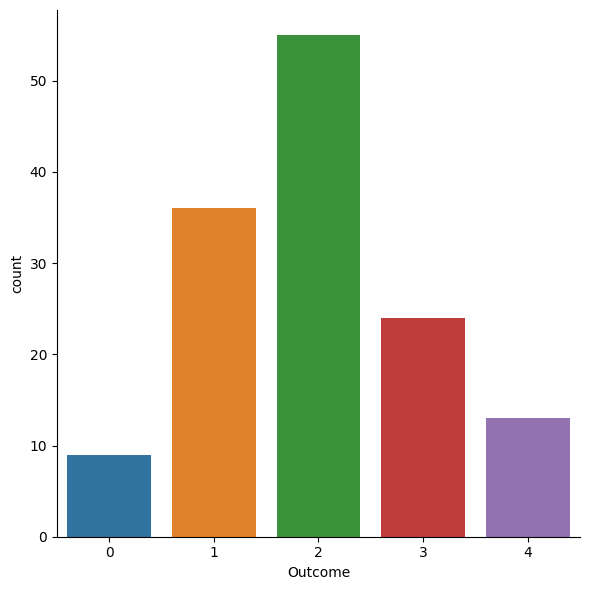

In [ ]:
# Display counts of classes
sns.catplot(x = 'Outcome', kind = "count", data = train_data, height = 6)

In [ ]:
train_data['Outcome'].value_counts()

2    55
1    36
3    24
4    13
0     9
Name: Outcome, dtype: int64

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1, 50):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(train_data)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


563929.2864935516


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


505492.7306445234


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


470513.05881441873


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


448473.7755996331


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


430286.195567036


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


415391.1667382924


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


404100.42821879266


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


391937.15805068496


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


388926.03757610335


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


376334.42400471587


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


363273.98054088006


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


365347.3317447343


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


351792.6691044236


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


347791.3802855804


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


337352.3424703878


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


333503.8643172204


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


327445.097936466


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


322682.613241098


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


318230.6883865595


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


311101.86232318287


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


303602.32718505163


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


301858.67177621165


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


296162.95765342494


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


289605.2100693793


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


281949.8936441222


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


274541.91718046134


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


276386.12790215627


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


271171.0592675556


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


265006.76071231917


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


262987.7141801582


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


256712.7038393115


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


252592.5558094395


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


246109.71151470262


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


244216.04805731506


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


237491.81066764623


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


232791.55743514298


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


231989.90111935546


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


226520.37734858418


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


222717.02484199923


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


216278.2888078874


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


214143.4951854003


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


211209.560331062


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


207568.71780533425


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


203932.63294245471


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


200269.9448999606


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


196864.46820686045


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


193979.53402856956


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


190852.14312930766


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


187940.62136050378


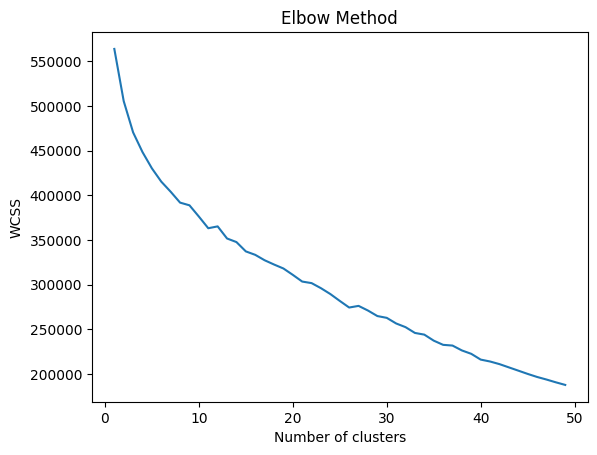

In [ ]:
plt.plot(range(1,50),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
X = train_data.drop('Outcome', axis = 1)
Y = train_data['Outcome']

In [ ]:
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
from sklearn.model_selection import train_test_split
# spliting of training & test is 80% to 20% ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
x_train.shape

(109, 16202)

In [ ]:
x_test.shape

(28, 16202)

In [ ]:
y_train.shape

(109,)

In [ ]:
y_test.shape

(28,)

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(x_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(x_train, y_train)

In [ ]:
poly_pred = poly.predict(x_test)
rbf_pred = rbf.predict(x_test)

In [ ]:
poly_pred

array([1, 4, 2, 0, 2, 0, 3, 4, 1, 3, 1, 2, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2,
       2, 1, 1, 3, 1, 3])

In [ ]:
plt.plot(x_test[0:5,1:16202],'o', label='Class label = A', color='yellow')
plt.plot(x_test[5:10,1:16202],'o', label='Class label = B', color='red')
plt.plot(x_test[10:15,1:16202],'o', label='Class label = C', color='blue')
plt.plot(x_test[15:20,1:16202],'o', label='Class label = C', color='black')
plt.plot(x_test[20:28,1:16202],'o', label='Class label = C', color='green')
plt.xlabel("Test data")
plt.legend(numpoints=1)

InvalidIndexError: ignored

In [ ]:
plt.plot(poly.pred,'o', label='Class label = [0],[1],[2],[3]', color='yellow','red','blue','black','green')
plt.xlabel("Test data")
plt.legend(numpoints=1)

In [ ]:
plt.plot(x_test[0:5,1:16202],'o', label='Class label = 0', color='yellow')
plt.plot(x_test[5:10,1:16202],'o', label='Class label = 1', color='red')
plt.plot(x_test[10:15,1:16202],'o', label='Class label = 2', color='blue')
plt.plot(x_test[15:20,1:16202],'o', label='Class label = 3', color='black')
plt.plot(x_test[28:29,1:16202],'o', label='Class label = 4', color='green')
plt.xlabel("Test data")
plt.legend(numpoints=1)

In [ ]:
plt.plot(poly_pred)

In [ ]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))


In [ ]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='poly', probability=True)
model.fit(X, Y)

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [ ]:

def build_model():
  model = Sequential()
  model.add(Dense(units = 64, activation='relu'))
  model.add(Dense(units = 5), kernel_regularizer=l2(0.01))
  model.add(activation('softmax'))
  model.compile(loss='squared_hinge',
              optimizer='adadelta',
              metrics=['accuracy'])
  model.fit(X, Y)
  return model


In [ ]:
# Building a Support Vector Machine on train data
svc_model = SVC(C=.1, kernel='poly', degree=3, gamma=1)
svc_model.fit(x_train, y_train)
prediction = svc_model .predict(x_test)
# check the accuracy on the training set
print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))